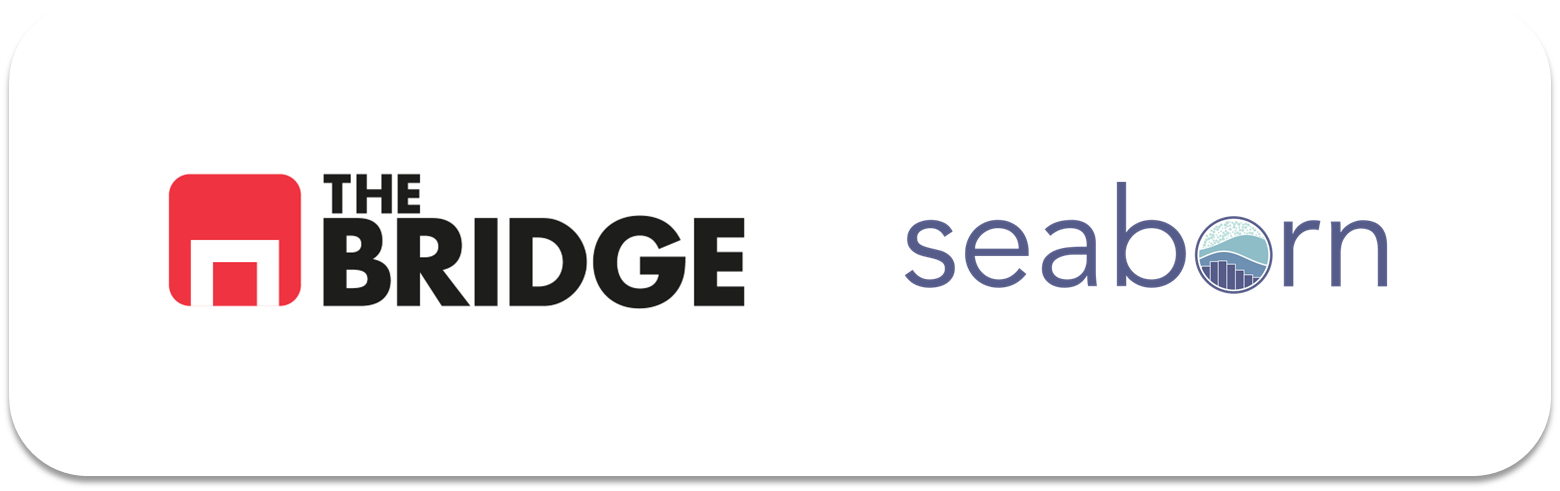

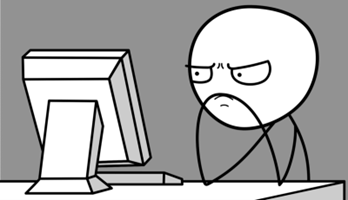

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)


### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [33]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [34]:
df_bitcoin["fechas"] = pd.to_datetime(df_bitcoin["date"])   # pasamos a fecha
df_bitcoin.set_index("fechas", inplace = True)              # la hacemos indice
df_bitcoin.drop("date", axis = 1, inplace = True)           # eliminamos date
df_bitcoin.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
fechas,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el `diagrama de barras de las frecuencias absolutas` de las columnas pasadas como argumento. \
No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [35]:
def frec_abs_categoricas(df, lista_col_cat):
   
    cols = 2  # Número de columnas por fila
    rows = (len(lista_col_cat) + cols - 1) // cols  # // division entera (redondeo hacia abajo autom)
                                                    # por eso sumamos (cols -1) a la longitud
                                                    # me asegura que el resto, se convierta en fila adicional
    
    # Crear la figura y los ejes
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 8))
    
    axs = axs.flatten() # Aplanar los ejes si hay más de una fila para iterar fácilmente
    
    # Iterar sobre las columnas categóricas y crear las gráficas
    for i, col in enumerate(lista_col_cat):
        sns.countplot(x = col,            # nombre col
                      data = df,          # del df
                      ax = axs[i],         # asigne al valor axs[i]
                      hue = col,        # hue, color de los datos (en funcion de x, de cada categoria)
                      legend = False)   # quitamos leyenda)       
        axs[i].set_title(f"Frecuencias absolutas de {col}")  # Título del gráfico
        axs[i].set_xlabel("")  # Título del gráfico
        axs[i].set_ylabel("")  # Título del gráfico
    
    # Si sobran celdas en la cuadrícula, ocultarlas
    for j in range(len(lista_col_cat), len(axs)):
        axs[j].axis("off")
    
    # Ajustar espacio entre los gráficos
    plt.tight_layout()
    fig   


### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


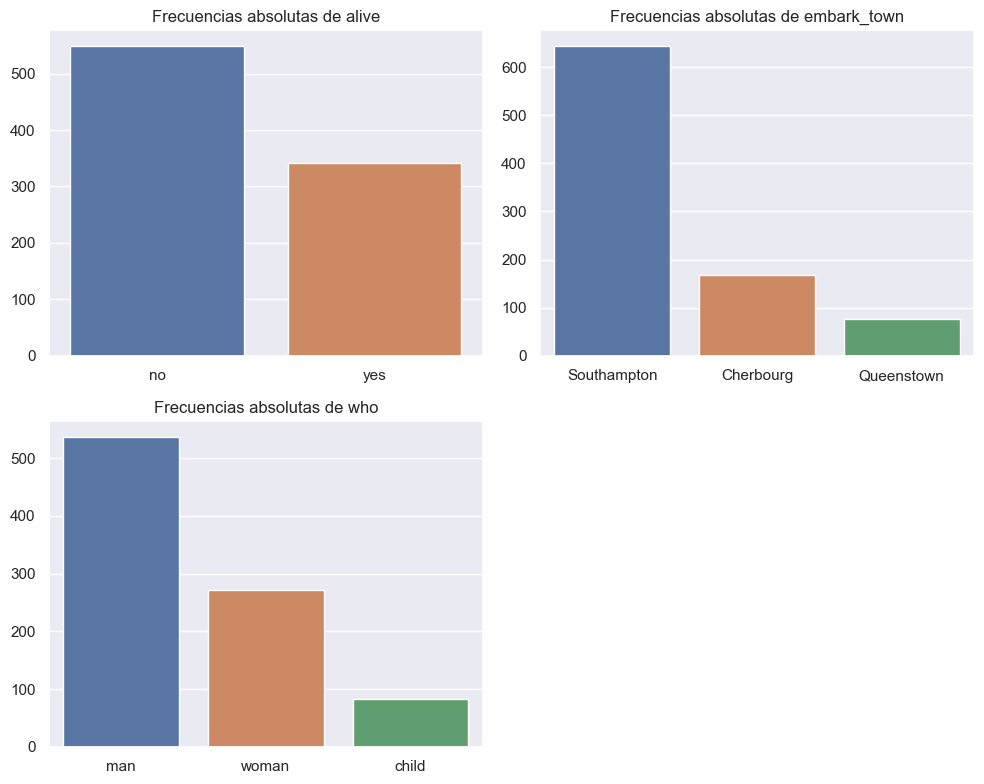

In [36]:
frec_abs_categoricas (df_titanic, ["alive", "embark_town", "who"])

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el `histograma de una lista de columnas numéricas`, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [37]:
def frec_num_histograma(df, lista_col_num, num_bins:int = 30, valor_kde:bool = False):
   
    cols = 2  # Número de columnas por fila
    rows = (len(lista_col_num) + cols - 1) // cols  # // division entera (redondeo hacia abajo autom)
                                                    # por eso sumamos (cols -1) a la longitud
                                                    # me asegura que el resto, se convierta en fila adicional
    
    # Crear la figura y los ejes
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 8))
    
    axs = axs.flatten() # Aplanar los ejes si hay más de una fila para iterar fácilmente
    
    # Iterar sobre las columnas categóricas y crear las gráficas
    for i, col in enumerate(lista_col_num):
        sns.histplot( x = col,           # col numérica
                      data = df,         # del df
                      kde=valor_kde,     # funcion densidad de probabilidad     
                      ax = axs[i],       # asigne al valor axs[i]
                      bins = num_bins)   # num bins       
        axs[i].set_title(f"{str.upper(col)}")  # Título del gráfico
        axs[i].set_xlabel("")  # Título del gráfico
        axs[i].set_ylabel("Frecuencia")  # Título del gráfico
    
    # Si sobran celdas en la cuadrícula, ocultarlas
    for j in range(len(lista_col_num), len(axs)):
        axs[j].axis("off")
    
    # Ajustar espacio entre los gráficos
    plt.tight_layout()
    fig   


### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

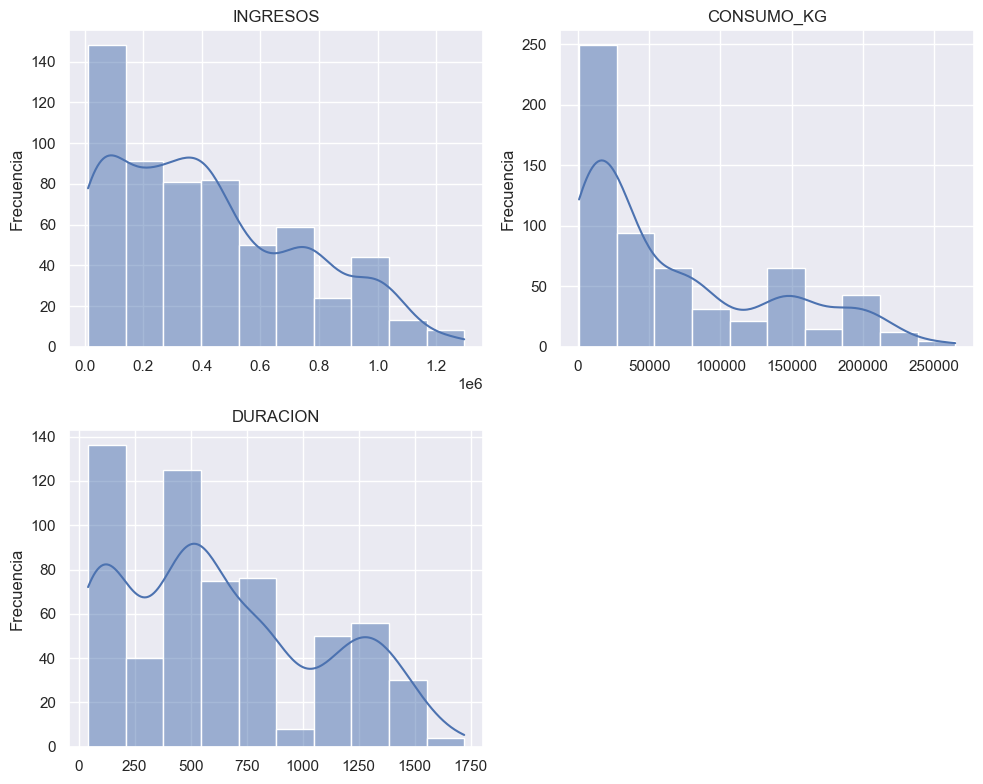

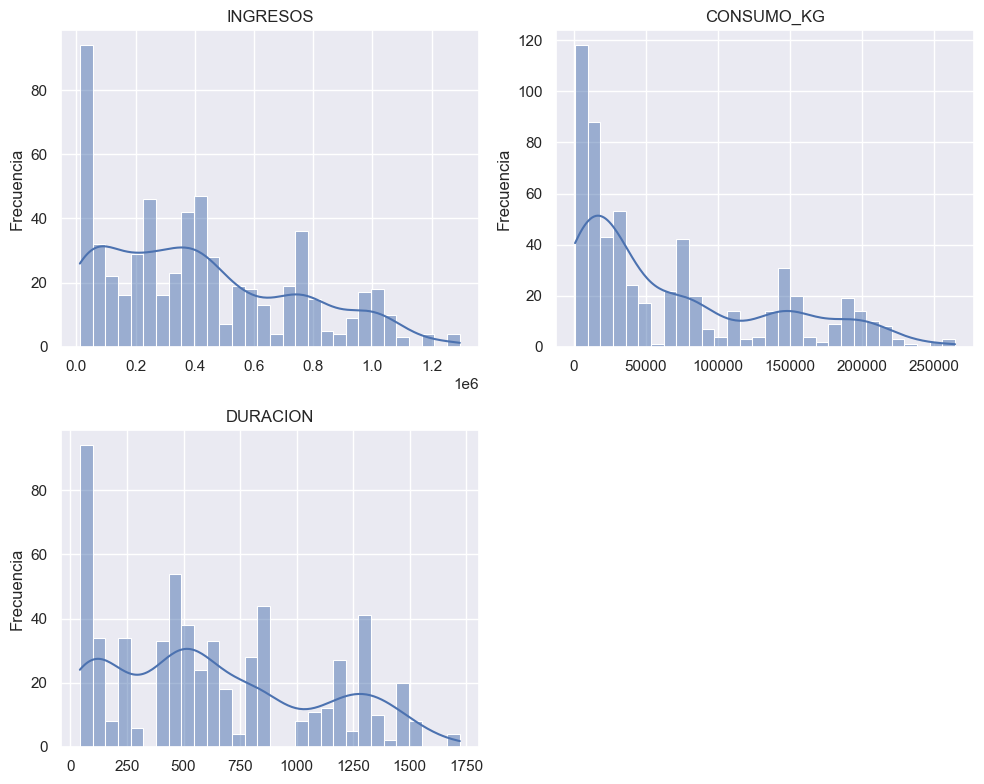

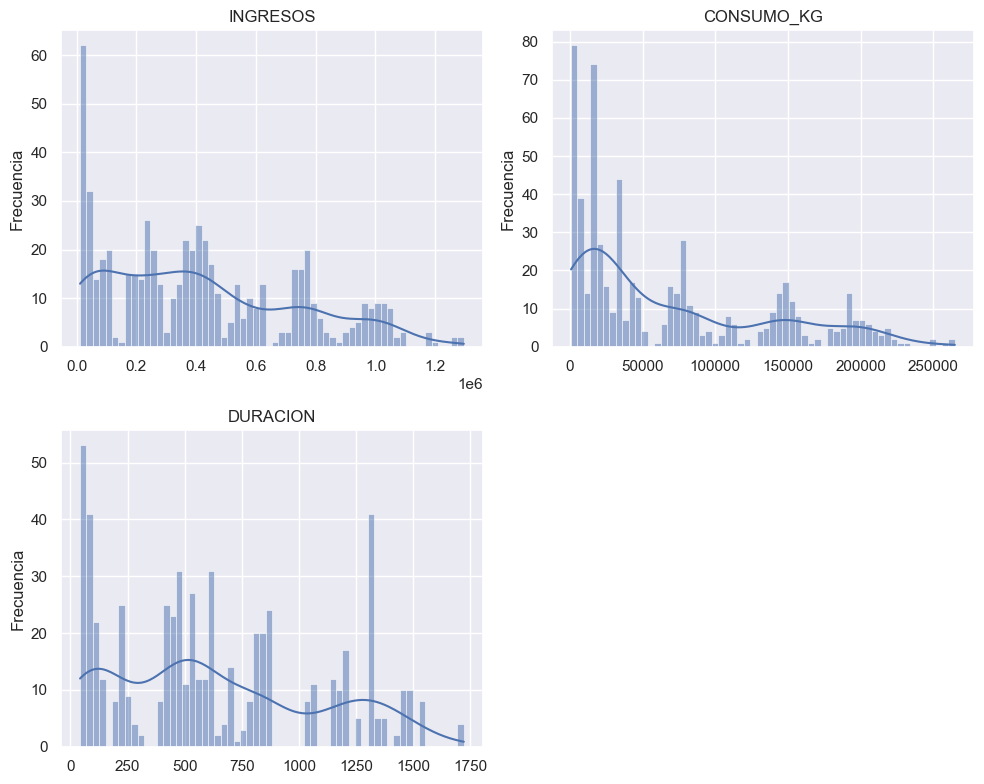

In [38]:
lista_de_bins = [10,30,60]
for bins in lista_de_bins:
    frec_num_histograma (df_viajes, 
                         ["ingresos","consumo_kg","duracion"], 
                         num_bins = bins, 
                         valor_kde=True)

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son `series temporales` o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [39]:
def serie_temporal(df, lista_col_num):
   
    cols = 2  # Número de columnas por fila
    rows = (len(lista_col_num) + cols - 1) // cols  # // division entera (redondeo hacia abajo autom)
                                                    # por eso sumamos (cols -1) a la longitud
                                                    # me asegura que el resto, se convierta en fila adicional
    
    # Crear la figura y los ejes
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 8))
    
    axs = axs.flatten() # Aplanar los ejes si hay más de una fila para iterar fácilmente
    
    # Iterar sobre las columnas categóricas y crear las gráficas
    for i, col in enumerate(lista_col_num):
        sns.lineplot( x = df.index,      # x, en el indice, como ya pusimos las fechas
                      y = col,           # y, la columna de la lista
                      data = df,         # del df  
                      ax = axs[i])       # asigne al valor axs[i]      
        axs[i].set_title(f"{str.upper(col)}")  # Título del gráfico
        axs[i].set_xlabel("")  # Título del gráfico
        axs[i].set_ylabel("")  # Título del gráfico
    
    # Si sobran celdas en la cuadrícula, ocultarlas
    for j in range(len(lista_col_num), len(axs)):
        axs[j].axis("off")
    
    # Ajustar espacio entre los gráficos
    plt.tight_layout()
    fig 


### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

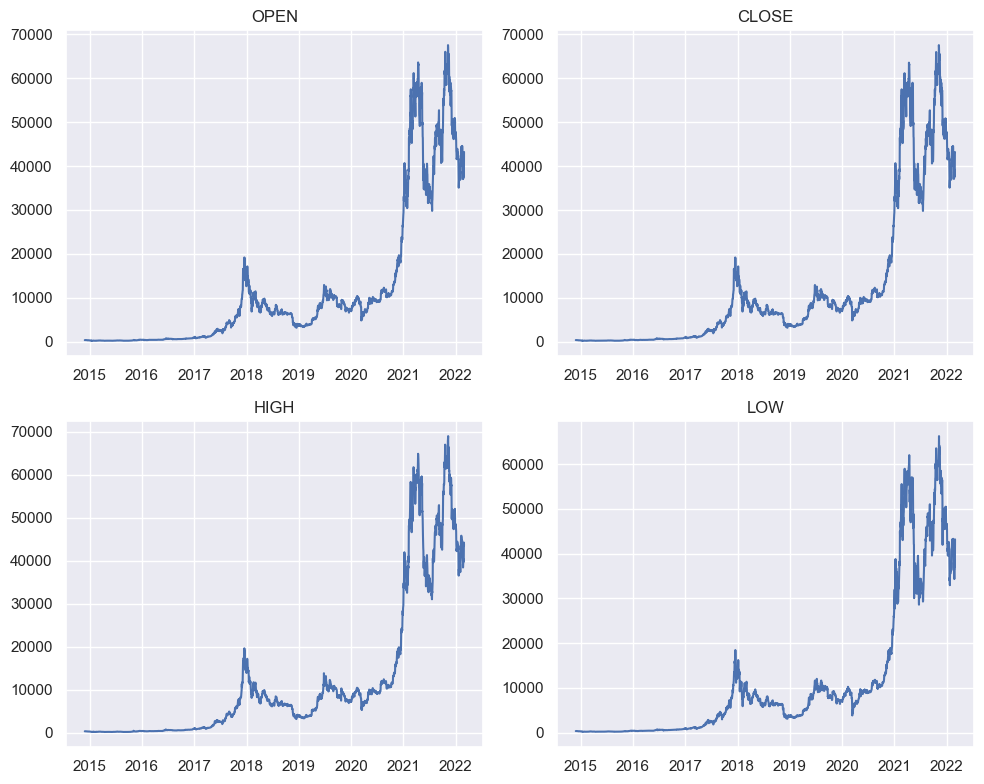

In [40]:
serie_temporal(df_bitcoin, ["open","close","high","low"])

### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. 
1) El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda.
2) El segundo debe permitir colocar una fecha de inicio
3) El tercero una fecha de fin. 

Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [41]:
def serie_temporal_combinada(df, 
                             lista_col_num, 
                             combinado = False, 
                             fecha_inicio = None, 
                             fecha_fin = None):
    cols = 2  # Número de columnas por fila

    # Convertir a fecha si no lo son
    if fecha_inicio is not None:
        fecha_inicio = pd.to_datetime(fecha_inicio)
    if fecha_fin is not None:
        fecha_fin = pd.to_datetime(fecha_fin)
    
    # Filtrar el DataFrame según las fechas proporcionadas
    if fecha_inicio is not None and fecha_fin is not None:
        df = df.loc[fecha_fin:fecha_inicio]
    elif fecha_inicio is not None:
        df = df.loc[:fecha_inicio]
    elif fecha_fin is not None:
        df = df.loc[fecha_fin:]

    rows = (len(lista_col_num) + 1) // 2
    
    if combinado:
        plt.figure(figsize=(10,6))
        for col in lista_col_num:

            sns.lineplot(x=df.index, 
                         y=df[col], 
                         label=col)
            
        plt.title("Plot combinado")
        plt.legend()
        plt.xlabel("Fecha")
        plt.ylabel("Valor")

    else:
        fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 8))
        axs = axs.flatten() # Aplanar los ejes si hay más de una fila para iterar fácilmente
        
        for i, col in enumerate(lista_col_num):
            sns.lineplot(   x = df.index,      # x, en el indice, como ya pusimos las fechas
                            y = col,           # y, la columna de la lista
                            data = df,         # del df  
                            ax = axs[i])       # asigne al valor axs[i]      
            axs[i].set_title(f"{str.upper(col)}")  # Título del gráfico
            axs[i].set_xlabel("")  # Título del gráfico
            axs[i].set_ylabel("")  # Título del gráfico

        # Si sobran celdas en la cuadrícula, ocultarlas
        for j in range(len(lista_col_num), len(axs)):
            axs[j].axis("off")
        fig

    plt.tight_layout()
    plt.show()

### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

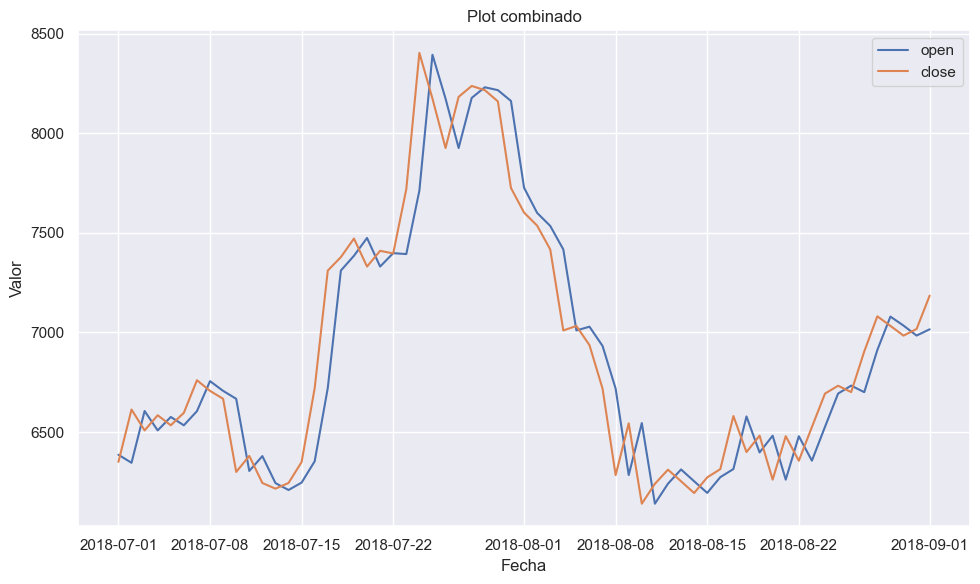

In [42]:
serie_temporal_combinada(df_bitcoin, 
                         ["open","close"], 
                         combinado=True, 
                         fecha_inicio='2018-07', 
                         fecha_fin='2018-09')

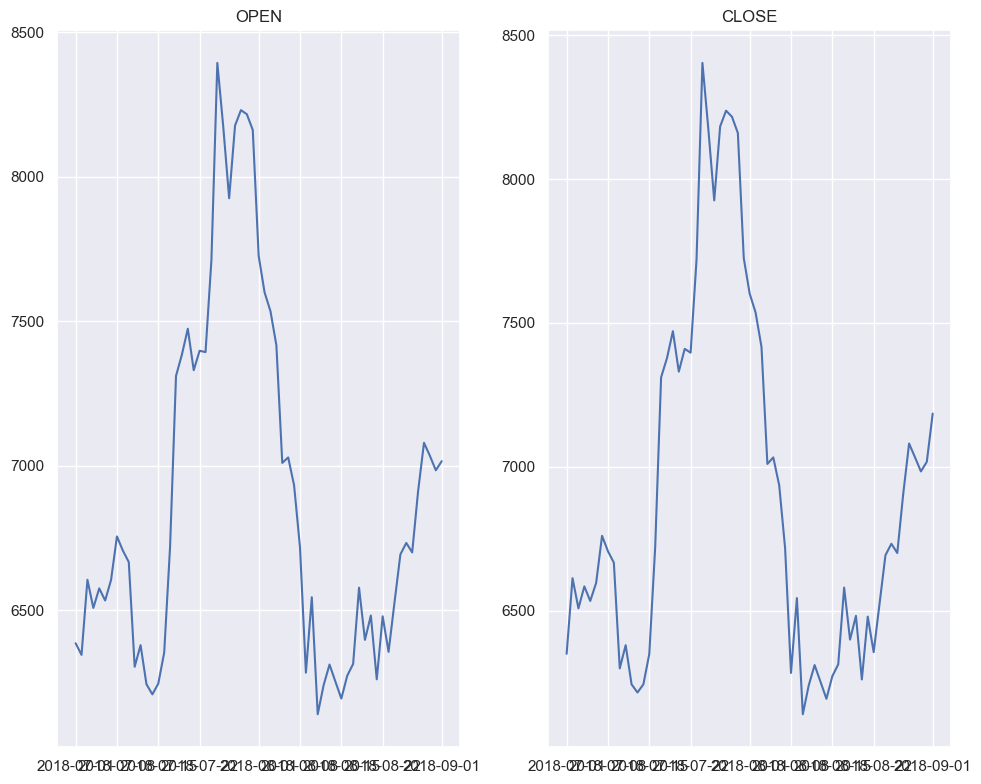

In [43]:
serie_temporal_combinada(df_bitcoin, 
                         ["open","close"], 
                         combinado=False, 
                         fecha_inicio='2018-07', 
                         fecha_fin='2018-09')

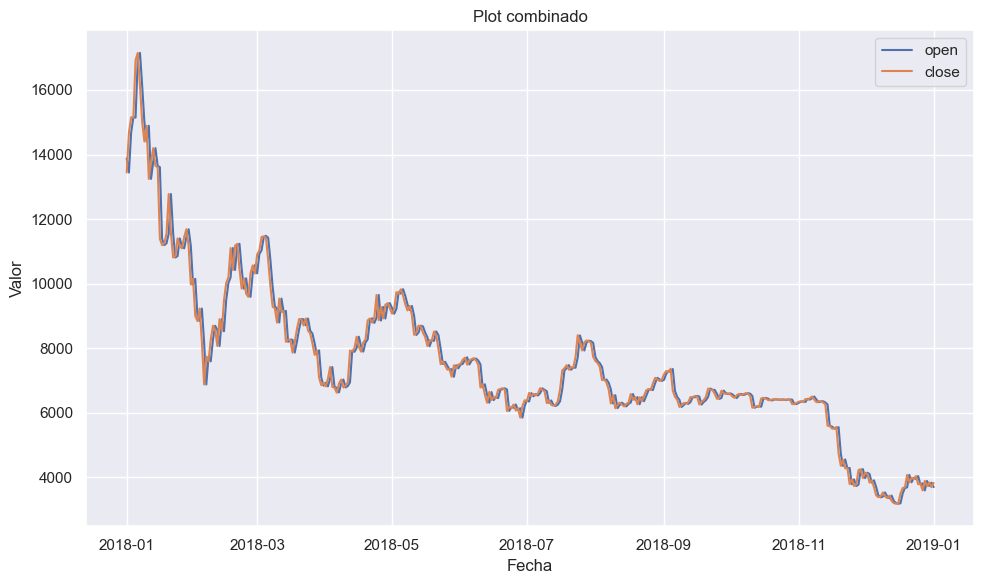

In [44]:
serie_temporal_combinada(df_bitcoin, 
                         ["open","close"], 
                         combinado=True, 
                         fecha_inicio='2018', 
                         fecha_fin='2019')

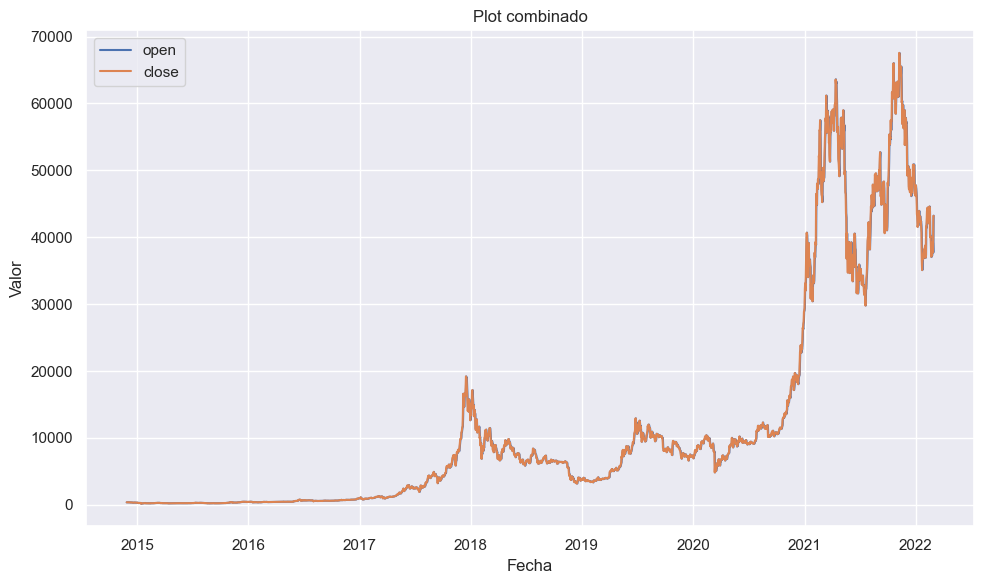

In [45]:
serie_temporal_combinada(df_bitcoin, 
                         ["open","close"], 
                         combinado=True, 
                         
                         fecha_fin='2024')

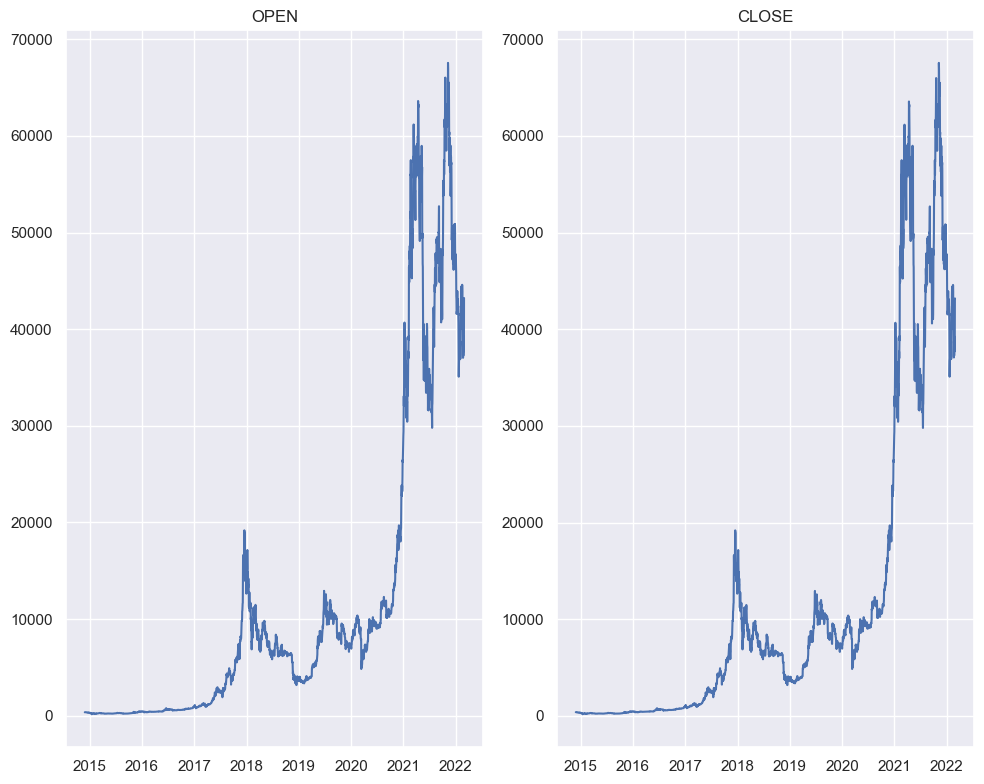

In [46]:
serie_temporal_combinada(df_bitcoin, 
                         ["open","close"], 
                         combinado=False )

In [47]:
 df_bitcoin.loc['2017', ['open', 'close']]

,open,close
fechas,,
2017-12-31,12640.00,13880.00
2017-12-30,14340.00,12640.00
2017-12-29,14470.07,14340.00
2017-12-28,15364.93,14470.07
2017-12-27,15764.44,15364.93
...,...,...
2017-01-05,1114.38,994.02
2017-01-04,1035.51,1122.56
2017-01-03,1011.44,1036.99
